# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ 
Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




1.   
We have that $I_n(2\pi\frac{k}{m})=\frac{1}{2\pi n}|\sum_{h=0}^{n-1} X_h e^{2i\pi\frac{k}{m} h}|^2$  

The module of a complex is the module of its conjugate and we know that X is a real process then 
$I_n(2\pi\frac{k}{m})=\frac{1}{2\pi n}|\sum_{h=0}^{n-1} X_h e^{-2i\pi\frac{k}{m} h}|^2$   
then  
$I_n(2\pi\frac{k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$






2.  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def periodogram(X,n,m,k):
    dft= np.fft.fft(X,m)
    
    return (np.absolute(dft[k]))**2/(2*np.pi*n)


3.  
   
We name $ g(\lambda)=\frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$  

 
then we have that $ \int_{0}^{2\pi}e^{i\lambda h} g(\lambda) d\lambda=\int_{0}^{2\pi}e^{i\lambda h} \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k} d\lambda$  
$= \sum_{k=0}^{n-1} \hat{\gamma}_n(k) \frac{1}{2\pi} \int_{0}^{2\pi}e^{i\lambda (h-k)} d\lambda $  
$= \hat{\gamma}_n(h)$

then we conclude that $g(\lambda)= I_n(\lambda)$    
then $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$



4.  

If we choose m=n : then  
$I_n(2\pi \frac{k}{n}) = \frac{1}{2\pi} \sum_{h=0}^{n-1} \hat{\gamma}_n(h)e^{-i2\pi h \frac{k}{n}}$   
then $\hat{\gamma}_n(h)= 2\pi IDFT(I_n(2\pi \frac{k}{n})) =2\pi \frac{1}{2\pi n} IDFT\left(\left|DFT(X, n)\right|^2, n\right)(k) = \frac{1}{n} IDFT\left(\left|DFT(X, n)\right|^2, n\right)(k) $




Here I copied some functions that I implemented in TP1.

In [3]:
def generateZ(sigma,n):
   Z=np.random.normal(0,sigma**2,n)
   return Z

def theoreticalAutoCov_Z(k,sigma):
   if k==0:
      return sigma**2
   else:
      return 0
def plotTtheoreticalAutoCov_Z(k,sigma,n,N):
   
   ACTheor =[]
   for i in  range(N):
      Z=generateZ(sigma,n)
      ACTheor.append(theoreticalAutoCov_Z(k,sigma))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor)

def generateX(sigma,a,b,n):
    Z = np.random.normal(0,sigma**2,n)
    X=np.zeros(n)
    X[0]=a+b*Z[0]
    for k in range(1,n):
      X[k]=a+b*Z[k]+Z[k-1]
    return X


def theoreticalAutoCov_X(k,sigma,b):
   if k==0:
      return (b**2+1)*(sigma**2)
   elif k==1:
      return b*(sigma**2)
   else :
      return 0
def plotTtheoreticalAutoCov_X(k,sigma,a,b,n,N):
   
   ACTheor =[]
   for i in  range(N):
      X=generateX(sigma,a,b,n)
      ACTheor.append(theoreticalAutoCov_X(k,sigma,b))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor)

def generateX2(sigma,a,n,K):
   Z=generateZ(sigma,n)
   X2 = np.zeros(n)
   for i in range(n):
      for k in range(max(i-K,0),i):
         X2[i]+=Z[i-k]/(2**k)
      X2[i]+=a
   return X2
def theoreticalAutoCov_X2(s,sigma):
   return (4/3)*(2**(-s))*(sigma)**2
def plotTtheoreticalAutoCov_X2(s,sigma,a,n,K,N):
   
   ACTheor =[]
   for i in  range(N):
      X=generateX2(sigma,a,n,K)
      ACTheor.append(theoreticalAutoCov_X2(s,sigma))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor)
def generateX3(A0,lambda0,sigma,n):
   Z=generateZ(sigma,n)
   phi0= np.random.uniform(0,2*np.pi,n)
   X3 = np.zeros(n)
   for i in range(n):
      X3[i]=A0*np.cos(lambda0*i+phi0[i])+Z[i]
   return X3
def theoreticalAutoCov_X3(s,A0,sigma,lambda0):
   result=(1/2)*(A0**2)*np.cos(lambda0*s)
   if s==0:
      result+= sigma**2
   return result
   
def plotTtheoreticalAutoCov_X3(s,A0,lambda0,sigma,n,N):
   #N : number of samplings
   ACTheor =[]
   for i in  range(N):
      X=generateX3(A0,lambda0,sigma,n)
      ACTheor.append(theoreticalAutoCov_X3(s,A0,sigma,lambda0))
   T=np.array(range(N))
   ACTheor=np.array(ACTheor)
   plt.plot(T,ACTheor)


In [9]:
# Using this estimator on the autocovariance of previous time series

def estimateAutoCov(X,h):
    n=len(X)
    dft = np.fft.fft(X,n)
    autocov=(1/n)*np.fft.ifft(np.absolute(dft)**2)[h]
    return autocov

def plotEstimatedAutoCovZ(k,sigma,n,N):
   
   #N : number of samplings
   ACEstimated=[]
   for i in range(N):
      Z=generateZ(sigma,n)
      ACEstimated.append(estimateAutoCov(Z,k))
   T=np.array(range(N))
   ACEstimated=np.array(ACEstimated)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+")process 0")
   plt.plot(T,ACEstimated,label=str(n)+"samples")
   plt.legend()

def plotEstimatedAutoCovX(k,sigma,a,b,n,N):
   
   #N : number of samplings
   ACEstimated=[]
   for i in range(N):
      X=generateX(sigma,a,b,n)
      ACEstimated.append(estimateAutoCov(X,k))
   T=np.array(range(N))
   ACEstimated=np.array(ACEstimated)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+")process 1")
   plt.plot(T,ACEstimated,label=str(n)+"samples")
   plt.legend()

def plotEstimatedAutoCovX2(k,sigma,a,n,K,N):
   
   #N : number of samplings
   ACEstimated=[]
   for i in range(N):
      X=generateX2(sigma,a,n,K)
      ACEstimated.append(estimateAutoCov(X,k))
   T=np.array(range(N))
   ACEstimated=np.array(ACEstimated)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+")process 2")
   plt.plot(T,ACEstimated,label=str(n)+"samples")
   plt.legend()

def plotEstimatedAutoCovX3(k,A0,lambda0,sigma,n,N):
   
   #N : number of samplings
   ACEstimated=[]
   for i in range(N):
      X=generateX3(A0,lambda0,sigma,n)
      ACEstimated.append(estimateAutoCov(X,k))
   T=np.array(range(N))
   ACEstimated=np.array(ACEstimated)
   plt.xlabel("draw")
   plt.ylabel("empirical auto cov("+str(k)+")process 3")
   plt.plot(T,ACEstimated,label=str(n)+"samples")
   plt.legend()
   

   





C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


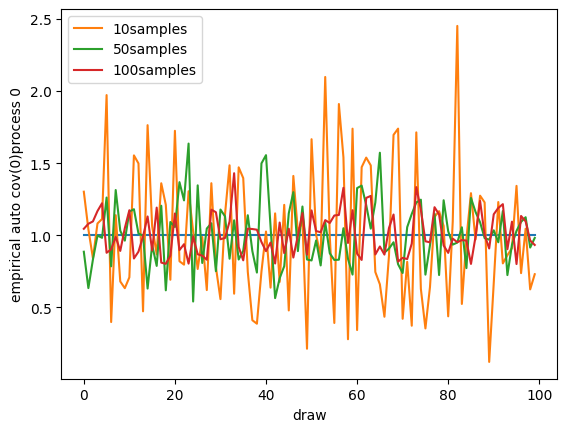

In [10]:
plotTtheoreticalAutoCov_Z(0,1,10,100)
plotEstimatedAutoCovZ(0,1,10,100) # using 10 samples

plotEstimatedAutoCovZ(0,1,50,100)# using 50 samples
plotEstimatedAutoCovZ(0,1,100,100)#using 100 samples

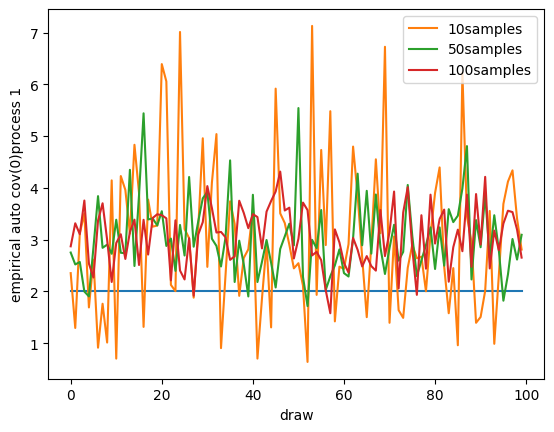

In [11]:
plotTtheoreticalAutoCov_X(0,1,1,1,10,100)
plotEstimatedAutoCovX(0,1,1,1,10,100)
plotEstimatedAutoCovX(0,1,1,1,50,100)
plotEstimatedAutoCovX(0,1,1,1,100,100)

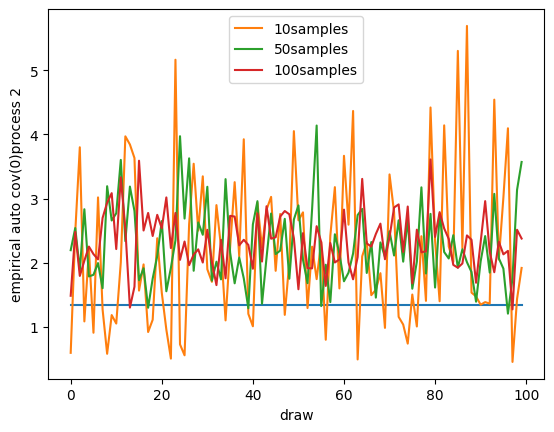

In [12]:
plotTtheoreticalAutoCov_X2(0,1,1,10,100,100)
plotEstimatedAutoCovX2(0,1,1,10,100,100)
plotEstimatedAutoCovX2(0,1,1,50,100,100)
plotEstimatedAutoCovX2(0,1,1,100,100,100)

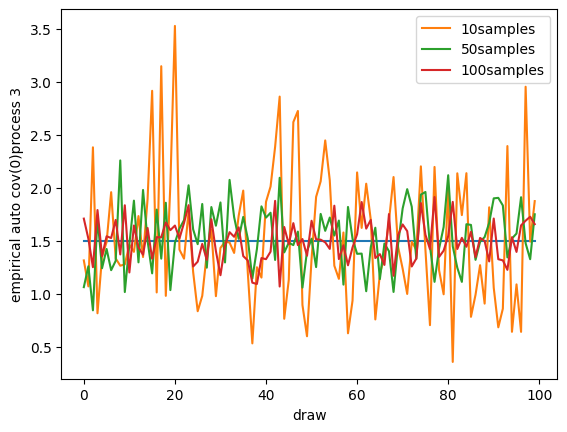

In [13]:
plotTtheoreticalAutoCov_X3(0,1,np.pi/2,1,10,100)
plotEstimatedAutoCovX3(0,1,np.pi/2,1,10,100)
plotEstimatedAutoCovX3(0,1,np.pi/2,1,50,100)
plotEstimatedAutoCovX3(0,1,np.pi/2,1,100,100)

5.  


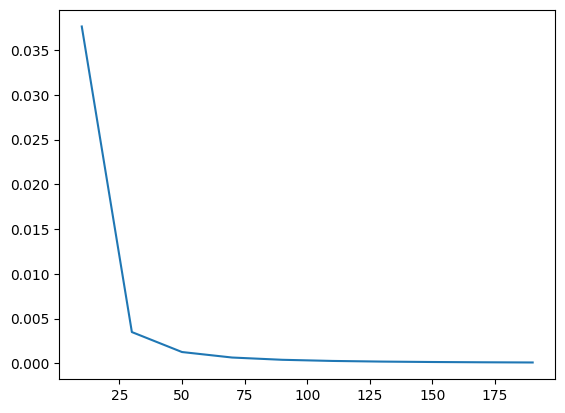

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def varPeriodigramWN(X,n,m):
    varPer=0
    for k in range(m):
        varPer+= np.absolute(periodogram(X,n,m,k))**2
    varPer=varPer/m
    return varPer
def generateZ(sigma,n):
   Z=np.random.normal(0,sigma**2,n)
   return Z
Z=generateZ(1,10)
T=np.array(range(10,200,20))
Var=[]
for n in T:
    
    Var.append(varPeriodigramWN(Z,n,n))



Var=np.array(Var)
plt.plot(T,Var)




